# Dynamic tension of a 1D rod: Lagrangian, Hamiltonian and port-Hamiltonian formulations
## Introduction
We are going to solve the 1D wave equation using different formulations showing equivalences and differences between them.
The 1D wave equation is given by:
$$ \rho A \partial_{tt} u = \partial_x (EA \partial_x u).$$
where $u$ is the displacement, $\rho$ the density, $A$ the cross-sectional area and $E$ the Young's modulus.

In [1]:
import numpy as np
from src.fem import mass_matrix_lagrange, stiffness_matrix_lagrange
from src.time_integration import explicit_newmark, implicit_newmark


## Problem Setup and Initialization
We define the problem parameters and discretize the domain.

In [2]:
# Parameters
# length = 1000  # Length of the domain (m)
# height_cross_section = 50 # Height cross section (m)
# width_cross_section = 50 # Width cross section (m)
# cross_section = height_cross_section * width_cross_section  # Cross section area (m^2)
# density = 2700  # Density of the fluid (kg/m^3)
# young_modulus = 70 * 1e9 # Young modulus (N/m^2)


height_cross_section = 1 # Height cross section (m)
width_cross_section = 1 # Width cross section (m)
density = 1  # Density of the fluid (kg/m^3)
young_modulus = 1 # Young modulus (N/m^2)

final_time = 2.0  # Total time
n_elements = 50  # Number of spatial elements
n_times = 2000  # Number of time steps

length = 1  # Length of the domain (m)

# Derived parameters
cross_section = height_cross_section * width_cross_section  # Cross section area (m^2)
mesh_size = length/ n_elements  # Spatial step size
time_step = final_time / n_times  # Time step size
wave_speed = np.sqrt(young_modulus/density)

density_unit_length = density * cross_section
axial_stiffness = young_modulus * cross_section
# Stability condition for explicit scheme
assert time_step <= 0.9*mesh_size / wave_speed, "Time step size too large for explicit scheme stability"

# Spatial grid
coordinates = np.linspace(0, length, n_elements+1)
# Temporal grid
time_instants = np.linspace(0, final_time, n_times+1)

# Initial conditions
displacement_at_0 = np.sin(2*np.pi * coordinates/length)  # Initial displacement
velocity_at_0 = np.zeros_like(coordinates)  # Initial velocity


##  Construction mass and stiffness matrices

In [3]:
M = mass_matrix_lagrange(coordinates, density_unit_length)
K = stiffness_matrix_lagrange(coordinates, axial_stiffness)


## Simulation using Newmark schemes

In [4]:

# # Run the explicit scheme
U_explicit = explicit_newmark(displacement_at_0, velocity_at_0, M, K,\
                              time_step, n_times)

# Run the implicit scheme
U_implicit = implicit_newmark(displacement_at_0, velocity_at_0, M, K,\
                              time_step, n_times)


## Visualization
We visualize the results to see the wave propagation over time.

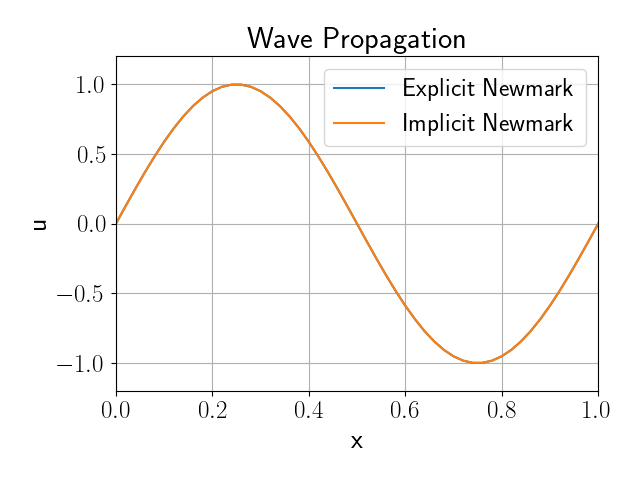

In [5]:
# Plot and animate results
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import src.matplotlib_options
%matplotlib widget

fig, ax = plt.subplots()
line1, = ax.plot(coordinates, U_explicit[0, :], label='Explicit Newmark')
line2, = ax.plot(coordinates, U_implicit[0, :], label='Implicit Newmark')
ax.set_xlim(0, length)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Wave Propagation')
ax.legend()
ax.grid(True)

def update(frame):
    line1.set_ydata(U_explicit[frame, :])
    line2.set_ydata(U_implicit[frame, :])
    return line1, line2,

ani = animation.FuncAnimation(fig, update, frames=range(0, n_times, 2), blit=True, interval=20)
plt.show()